# Capstone Project - Car Accident Severity (Week 2) by Julio Ferrón
### Applied Data Science Capstone by IBM/Coursera

 This notebook is created to be used in the final course of the IBM Data Science Certificate, composed by 9 courses. In this notebook, we will work with the car accident data of a city, in order to predict the risk of accident based on de different features of a given dataset using machine learning algorithms.

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Introduction: Business Problem <a name="introduction"></a>



You probably have a familiar, friend (or even yourself) who is afraid of air travel. The speed, the height, the feeling when taking off and landing... Well, you should know that the probabilities of suffering a plane accident are very low if we compare them, for example, with the possibilities of suffering a car accident.

Car travelling is more than present in many people's lives. We use the car for many and even many times in one day. Even when the use of public transport is increasing, there are not always public transport options available in all places. 

So, how can we face the risk of traveling by car?

- You should listen to the authorities
- Use your belt
- Do not drive if you are drunk.
- Do not exceed speed limits

But that's not all. There are many other aspects and variables about the possibilities of having an accident (and the severity of it) that must be taken into account. 

In this sense, the aim of this project is to help stakeholders reduce exposure to the risk of suffer a fatal car accident based on a prediction of the severity  of a car journey based on different conditions.

The main stakeholders in this work would be:

- Car drivers.
- The authorities.
- The insurance companies.


## 2. Data <a name="data"></a>


We will use for our purpose the following dataset: 

<b>"*All* *collisions* *provided* *by* *SPD* *and* *recorded* *by* *Traffic* *Records* "</b> You can find this data [here!!](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv) 

This Dataset includes a record of all collisions ocurred in the city of Seattle  (Washingthon) from 2004 to 2020. 

The dataset includes the feature **"SEVERITY** **CODE"** which indicates the severity of the car accident. This variable will be our dependent variable (Y), and our goal will be to predict it. The variable can have the following values per accident:

- 3—fatality
- 2b—serious injury
- 2—injury
- 1—prop damage
- 0—unknown 



Lets take a look to the dataset feauteres and their descriptions

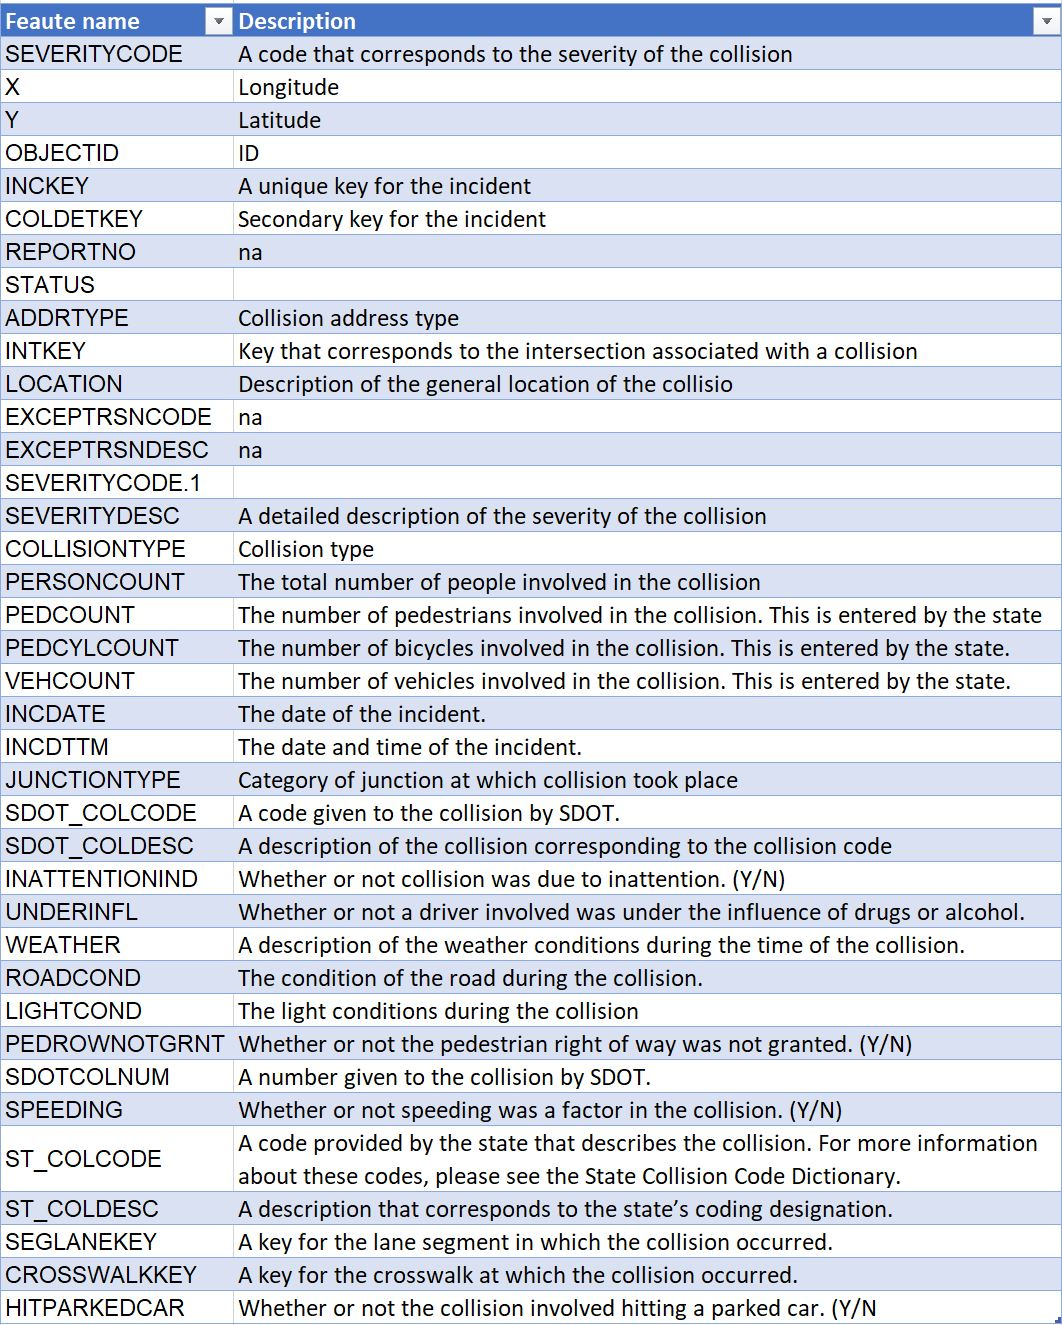

In [1]:
from IPython.display import Image
i = Image(filename='image/a.JPG')
i

## Data visualization and pre-processing

Lets import some usefull tools for data cleaning and preparation

In [2]:
# Import pandas and numpy in order to perfom an exploratory data analysis
import pandas as pd
import numpy as np


import datetime as dt
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



We have already downloaded the dataset in local, but you can find [here!!](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv)

In [3]:
# We convert it to a Pandas Dataframe and perform a little exploration
df = pd.read_csv('Data-Collisions (3).csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df['STATUS'].value_counts()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

DROP unmatched data

In [6]:
df['STATUS'].dropna(axis=0, inplace= True)

Exploring what type od data  we are dealing with

In [7]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [8]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

In [9]:
df['UNDERINFL']
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In 'INATTENTIONIND' the value 'Y' stands for YES, and an empty value stands for 'NO', lets replace empty values with 'N'

In [10]:
df['INATTENTIONIND'].fillna('N', inplace= True)
df['INATTENTIONIND'].value_counts()


N    164868
Y     29805
Name: INATTENTIONIND, dtype: int64

In [11]:
for column in df.columns.values.tolist():
    print(column)
    print (df[column].value_counts())
    print("")  

SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

X
-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: X, Length: 23563, dtype: int64

Y
47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: Y, Length: 23839, dtype: int64

OBJECTID
2047     1
1194     1
58550    1
64693    1
62644    1
        ..
96890    1
90745    1
92792    1
70263    1
2049     1
Name: OBJECTID, Length: 194673, dtype: int64

INCKEY
266238    1
81549     1
104088    1
126615    1
124566    1
         ..
164613    1
176899    1
178946    1
172801    1
295445    1
Name: INCKEY, Length: 194673, dtype: int64

COLDETKEY
266238    1
122129    1
111900    1
101659    1
99610     1
         ..
137750    1


### Selecting columns

Based on the Metadata information, we select the useful and potential useful columns

In [12]:
df1 = df[['SEVERITYCODE','ADDRTYPE' ,'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDATE','INCDTTM','JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']]


We use value_counts to have a quick look in the most common values per column

### Identifying missing values

Before start the explanatory data analysis, we have to identify missing and NaN values

In [13]:
df1['PEDROWNOTGRNT'].fillna('N', inplace=True)
df1['SPEEDING'].fillna('N', inplace=True)



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [14]:
missing_data = df1.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDATE
False    194673
Name: INCDATE, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    194673
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    194673
Name: 

In [15]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [16]:
cac = df1

#### We have to deal with missing values taking the correct approach for each colum





ROADCOND- **ADDRTYPE**, **JUNCTIONTYPE**,**UNDERINFL**, **WEATHER**, **ROADCOND**, **LIGHTCOND**: replace MISSING VALUES ROWS by most frecuent value

In [17]:
# ADDTYPE

add_max= cac['ADDRTYPE'].value_counts().idxmax()
cac['ADDRTYPE'].replace(np.nan,  add_max, inplace= True)


# LOCATION

jun_max= cac['JUNCTIONTYPE'].value_counts().idxmax()
cac['JUNCTIONTYPE'].replace(np.nan,  jun_max, inplace= True)


# UNDERINFL

und_max= cac['UNDERINFL'].value_counts().idxmax()
cac['UNDERINFL'].replace(np.nan,  und_max, inplace= True)

# WEATHER

we_max= cac['WEATHER'].value_counts().idxmax()
cac['WEATHER'].replace(np.nan,  we_max, inplace= True)

# ROADCOND

rc_max= cac['ROADCOND'].value_counts().idxmax()
cac['ROADCOND'].replace(np.nan,  rc_max, inplace= True)

# LIGHTCOND

lc_max= cac['LIGHTCOND'].value_counts().idxmax()
cac['LIGHTCOND'].replace(np.nan,  lc_max, inplace= True)



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Checking if we have cleaned all missing values

In [18]:
missing_data = cac.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    194673
Name: ADDRTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDATE
False    194673
Name: INCDATE, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    194673
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    194673
Name: UNDERINFL, dtype: int64

WEATHER
False    194673
Name: WEATHER, dtype: int64

ROADCOND
False    194673
Name: ROADCOND, dtype: int64

LIGHTCOND
False    194673
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    194673
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64

HITPARKEDCAR
False    194673
Name: HITPARKEDCAR, dtype: int64



In [19]:
cac.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),N,N,Overcast,Wet,Daylight,N,N,N
1,1,Block,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),N,0,Raining,Wet,Dark - Street Lights On,N,N,N
2,1,Block,4,0,0,3,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),N,0,Overcast,Dry,Daylight,N,N,N
3,1,Block,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),N,N,Clear,Dry,Daylight,N,N,N
4,2,Intersection,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),N,0,Raining,Wet,Daylight,N,N,N


In [20]:
cac['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              96129
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [21]:
cac.shape

(194673, 17)

In [22]:
we_values = list(cac['WEATHER'].values)

In [23]:
cac['ROADCOND'].value_counts()

Dry               129522
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

## Encoding Cathegorical variables

Parece que esto empieza a coger forma. Como habrás podido observar, muchs de las columnas son categóricas y no se corresponden con caracteres numéricos. Vamos a corregir esto.

In [24]:
categorical = cac.select_dtypes(include=['object']).copy()
categorical_cols = categorical.columns.tolist()

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

for column in categorical_cols:
    cac[column]= label_encoder.fit_transform(cac[column].astype(str))
    
    

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [25]:
cac.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,2,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,1,0,2,4,8,5,0,0,0
1,1,1,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,4,0,0,6,8,2,0,0,0
2,1,1,4,0,0,3,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,4,0,0,4,0,5,0,0,0
3,1,1,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,4,0,2,1,0,5,0,0,0
4,2,2,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,1,0,0,6,8,5,0,0,0


## 2. METHODOLOGY

### Exploratory Data Analysis

### Lets check if the date have impact on the severity of the accident

In [26]:
# Day of the week
cac['dayofweek'] = cac['INCDATE'].dt.dayofweek
bins = np.linspace(cac.dayofweek.min(), cac.dayofweek.max(), 10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


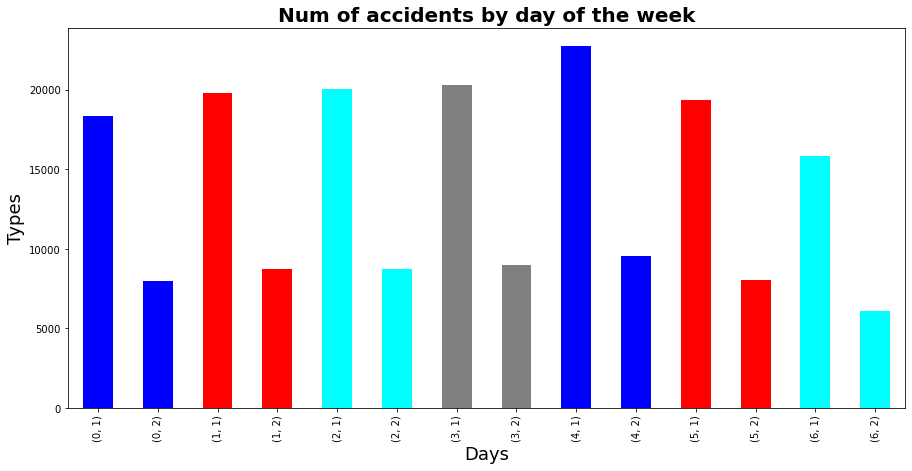

In [27]:
a = cac.groupby(['dayofweek', 'SEVERITYCODE'])['SEVERITYCODE'].count()
plt.figure(figsize=(15,7))
ax = a.plot(kind='bar', color = ['blue', 'blue', 'red', 'red', 'cyan', 'cyan','gray','gray','blue', 'blue', 'red', 'red', 'cyan', 'cyan','gray','gray'] )
plt.xlabel('Days')
plt.ylabel('Types')
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
graph_title = 'Num of accidents by day of the week'
plt.title(graph_title, fontsize = 20, fontweight = 'bold')
graph_title_for_save = 'road'
plt.savefig(graph_title_for_save + '.png')
plt.show()

Well, it looks like the day of the week does not have much impact on the severity of the accident, even when it looks like de fridays the number of type 1: property damage accidents, is higher the proportion keeps constant.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


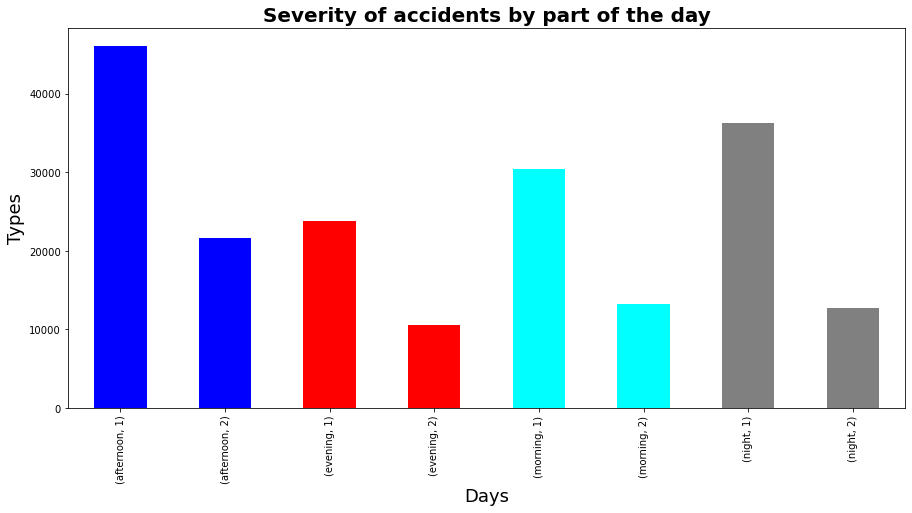

In [28]:
# Part of the day

cac['hour'] = cac['INCDTTM'].dt.hour
def get_part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )

# If you want to use current hour:
# from datetime import datetime
# h = datetime.now().hour
# stdout.write('have a good {0}!\n'.format(get_part_of_day(h)))

cac['partoftheday'] = cac['hour'].apply(lambda x: get_part_of_day(x))

a = cac.groupby(['partoftheday', 'SEVERITYCODE'])['SEVERITYCODE'].count()
plt.figure(figsize=(15,7))
ax = a.plot(kind='bar', color=['blue', 'blue', 'red', 'red', 'cyan', 'cyan','gray','gray'] )
plt.xlabel('Days')
plt.ylabel('Types')
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
graph_title = 'Severity of accidents by part of the day'
plt.title(graph_title, fontsize = 20, fontweight = 'bold')
graph_title_for_save = 'road'
#y_pos = ('Afternoon 1', 'Afternoon 2', 'Evening 1', 'Evening 2', 'Morning 1','Morning 2', 'Night 1', 'Night 2')
#plt.bar(y_pos, ,color=(0.2, 0.4, 0.6, 0.6))
plt.savefig(graph_title_for_save + '.png')
plt.show()

The moment of the day does not have much impact on the severity of the accident. Even when in afternoons we can find a higher number of accidents ( including type 1 and 2), the proportion keeps constant and in the line of the rest of the parts of the day. As we didnt found relevant, drop time variables

In [29]:
# As we did

cac = cac.drop(['partoftheday','hour','dayofweek','INCDATE','INCDTTM'], axis = 1)



Our dependent variable (y) is 'SEVERITYCODE'. In this sense, we should check if the daa contained in it its balanced or not. We can use a visualizaton figure as histogram in order to discover it.

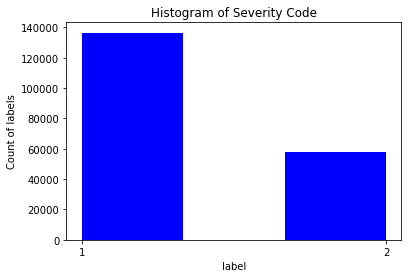

In [30]:
cac['SEVERITYCODE'].plot(kind='hist',bins=3, figsize=(6, 4), color = ['blue', 'red'])
labels, counts = np.unique(cac['SEVERITYCODE'], return_counts=True)
plt.title('Histogram of Severity Code')
plt.ylabel('Count of labels') # add y-label
plt.xlabel('label') # add x-label
plt.gca().set_xticks(labels)
plt.show()

The value 1 "Property damage" it represented almost the double than the value 2 "injury". That means that the data needs to be balance in order to perform correctly. Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance. 

Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

### SMOTE for oversampling imbalanced classification

In [31]:
#pip install imblearn

In [32]:
# PARA QUE FUNCIONE TRAS DESCARGAR IBMLEARN BAJAR A 0.22.2
#!pip install scikit-learn==0.22.2

In [33]:
from imblearn.over_sampling import SMOTE 

In [34]:
X = cac.drop('SEVERITYCODE',1)
y = df['SEVERITYCODE']
print(X.shape, y.shape)

(194673, 14) (194673,)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
print(X_train.shape, y_test.shape)

(136271, 14) (58402,)


In [36]:
!pip install scikit-learn==0.23.2

#INSTALAR Y LUEGO RESTART KERNEL

In [37]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

Lets check the difference between unbalanced and balanced data with SMOTE

In [38]:

from collections import Counter

print("Before smote:", Counter(y_train))
print("After smote:", Counter(y_train_smote))

Before smote: Counter({1: 95402, 2: 40869})
After smote: Counter({2: 95402, 1: 95402})


In [ ]:
X_train_smote

In [ ]:
X_train_smote.to_csv('X_train_smote.csv')
y_train_smote.to_csv('y_train_smote.csv')
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')

## 3. Classification 

We are going to use the training set to build an accurate model with the help of different classification techniques

### 3.1 Decision Trees

In [ ]:
import pandas as pd

In [ ]:
#X_train_smote = pd.read_csv('X_train_smote.csv')
#y_train_smote = pd.read_csv('y_train_smote.csv')
#X_test = pd.read_csv('X_test.csv')
#y_test = pd.read_csv('y_test.csv')

In [40]:
!pip install --upgrade scikit-learn==0.22

  Using cached https://files.pythonhosted.org/packages/2e/d0/860c4f6a7027e00acff373d9f5327f4ae3ed5872234b3cbdd7bcb52e5eff/scikit_learn-0.22-cp36-cp36m-manylinux1_x86_64.whl
ERROR: imbalanced-learn 0.7.0 has requirement scikit-learn>=0.23, but you'll have scikit-learn 0.22 which is incompatible.
  Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [41]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


max_depth=10
accuracy = np.zeros((max_depth,1))
for depth in range(1,max_depth+1):
    decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    decisiontree.fit(X_train_smote, y_train_smote)
    y_hat = decisiontree.predict(X_test)
    accuracy[depth-1] = accuracy_score(y_hat, y_test)

plt.plot(range(1,max_depth+1),accuracy, color="red", label="F1 score")
plt.title("Performance (Decision Tree)")
plt.xlabel("Maximum Depth")
plt.ylabel("Performance")
plt.show()

In [43]:
cacTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
cacTree # it shows the default parameters


DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [44]:
cacTree.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [45]:
predTree = cacTree.predict(X_test)

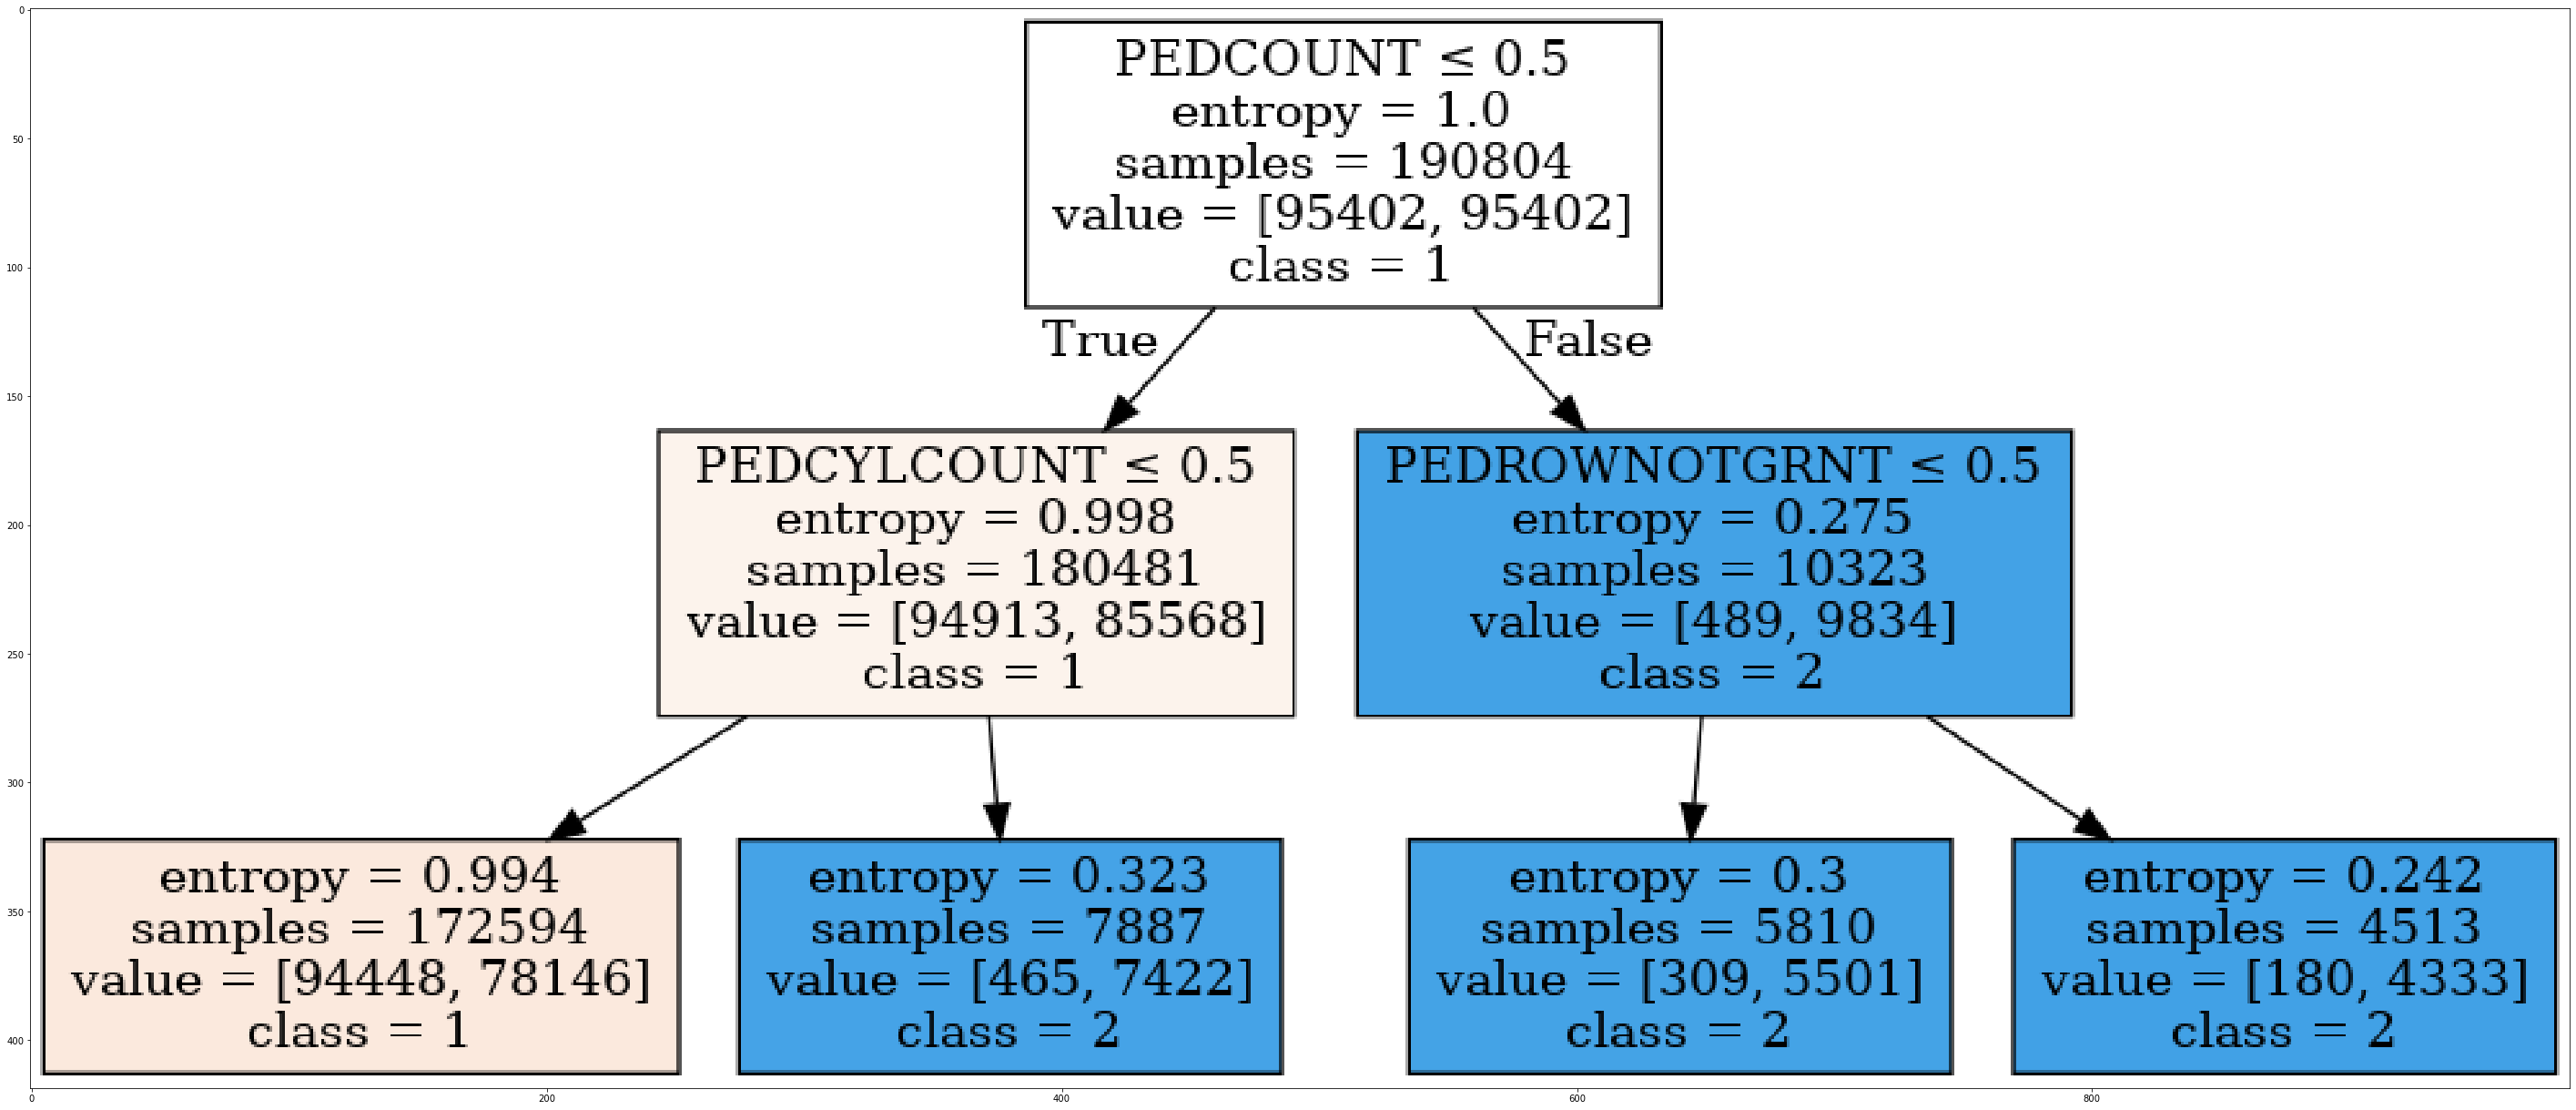

In [46]:
dot_data = StringIO()
filename = "cactree.png"
featureNames = cac.columns[1: 15].tolist()
targetNames = cac["SEVERITYCODE"].unique().tolist()
out= tree.export_graphviz(cacTree ,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train_smote.astype(str)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50, 100))
plt.imshow(img,interpolation='nearest')

#### DECISION TREE EVALUATION

In [ ]:
#!pip install scipy

In [47]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
jaccard = []
f1 = []
accuracy = []

In [52]:
print(jaccard_score(y_test, predTree))
print(f1_score(y_test, predTree, average='weighted') )
print(metrics.accuracy_score(y_test, predTree))
print(classification_report(y_test, predTree))
print(confusion_matrix(y_test, predTree))

0.7379319105691057
0.6903567707647106
0.7527310708537379
              precision    recall  f1-score   support

           1       0.74      0.99      0.85     41083
           2       0.89      0.19      0.31     17319

    accuracy                           0.75     58402
   macro avg       0.82      0.59      0.58     58402
weighted avg       0.79      0.75      0.69     58402

[[40663   420]
 [14021  3298]]


In [54]:
import itertools

Confusion matrix, without normalization
[[40663   420]
 [14021  3298]]


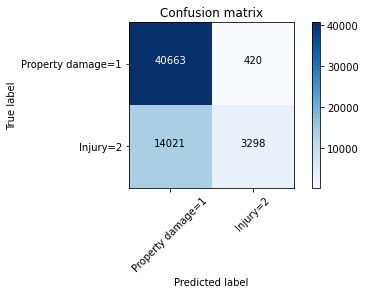

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Plot it
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,2])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property damage=1','Injury=2'],normalize= False,  title='Confusion matrix')

### 3.2 K Nearest Neighbor(KNN)

In [50]:

from sklearn.neighbors import KNeighborsClassifier

In [51]:
import numpy as np

In [56]:


neigh = KNeighborsClassifier(n_neighbors = 5).fit(X_train_smote,y_train_smote)





In [57]:
yhat=neigh.predict(X_test)

In [58]:
print(jaccard_score(y_test, yhat))
print(f1_score(y_test, yhat, average='weighted') )
print(metrics.accuracy_score(y_test, yhat))
print(classification_report(y_test, yhat))
print(confusion_matrix(y_test, yhat))

0.6535218601670305
0.7027747983945889
0.7037772679017842
              precision    recall  f1-score   support

           1       0.79      0.79      0.79     41083
           2       0.50      0.49      0.49     17319

    accuracy                           0.70     58402
   macro avg       0.64      0.64      0.64     58402
weighted avg       0.70      0.70      0.70     58402

[[32631  8452]
 [ 8848  8471]]


Confusion matrix, without normalization
[[32631  8452]
 [ 8848  8471]]


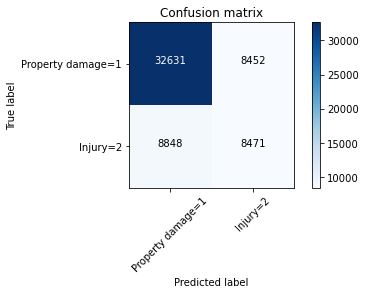

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Plot it
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property damage=1','Injury=2'],normalize= False,  title='Confusion matrix')

### 3.3 Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='newton-cg')

In [61]:
yhatl = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [62]:
f1_score(y_test, yhatl, average='weighted')
print(f1_score(y_test, yhatl, average='weighted') )
print(metrics.accuracy_score(y_test, yhatl))
print(classification_report(y_test, yhatl))

0.7035806625154059
0.7526112119447964
              precision    recall  f1-score   support

           1       0.75      0.97      0.85     41083
           2       0.76      0.24      0.36     17319

    accuracy                           0.75     58402
   macro avg       0.76      0.60      0.61     58402
weighted avg       0.76      0.75      0.70     58402



In [63]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.522334090034758

Confusion matrix, without normalization
[[39805  1278]
 [13170  4149]]


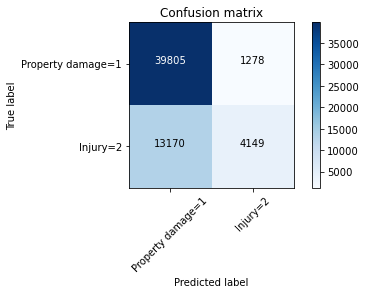

In [64]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Plot it
cnf_matrix = confusion_matrix(y_test, yhatl, labels=[1,2])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property damage=1','Injury=2'],normalize= False,  title='Confusion matrix')

### 3.4 SVM

In [65]:
from sklearn import svm

In [66]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [67]:
yhats = clf.predict(X_test)

In [68]:
f1_score(y_test, yhats, average='weighted')
print(f1_score(y_test, yhats, average='weighted') )
print(metrics.accuracy_score(y_test, yhats))
print(classification_report(y_test, yhats))

0.6937663734362939
0.7538269237354885
              precision    recall  f1-score   support

           1       0.75      0.99      0.85     41083
           2       0.87      0.20      0.32     17319

    accuracy                           0.75     58402
   macro avg       0.81      0.59      0.59     58402
weighted avg       0.78      0.75      0.69     58402

